# Notes: Building LLMs for Production (Book Resource)

## Chapter 1:

1. Language Model - It means learning the probability distribution of words within a language based on a large corpus. This learning process typically involves predicting the next token in a sequence using either classical statistical methods or novel deep learning techniques.
2. Tokenization -  It involves breaking down the input text into smaller pieces known as tokens. Tokens can range from single characters to entire words, and the size of these tokens can greatly influence the model’s performance. The tokenization process is model-dependent.

**More on** tokenization. Here are some of the most common types:

### 1. **Word Tokenization**
- **Definition**: Splits text into individual words.
- **Usage**: Simple and commonly used for many NLP tasks.
- **Example**: "The quick brown fox" becomes ["The", "quick", "brown", "fox"].

### 2. **Subword Tokenization**
- **Byte Pair Encoding (BPE)**: Merges the most frequent pairs of bytes in a dataset iteratively. Useful for balancing vocabulary size and handling rare words.
  - **Example**: "unhappiness" might become ["un", "happiness"] and "happiness" into ["happ", "iness"].
- **WordPiece**: Similar to BPE, but optimized for use with specific models like BERT. It ensures the most frequent subword units are captured.
  - **Example**: "playing" might become ["play", "##ing"].
- **SentencePiece**: A more generalized approach to subword tokenization that can handle both word and character-level tokenization.
  - **Example**: "こんにちは" becomes ["▁こん", "に", "ちは"].

### 3. **Character Tokenization**
- **Definition**: Breaks text down into individual characters.
- **Usage**: Useful for languages with large character sets or where word boundaries are unclear.
- **Example**: "hello" becomes ["h", "e", "l", "l", "o"].

### 4. **Sentence Tokenization**
- **Definition**: Splits text into sentences.
- **Usage**: Useful for tasks that require sentence-level analysis.
- **Example**: "Hello world. How are you?" becomes ["Hello world.", "How are you?"].

### 5. **Whitespace Tokenization**
- **Definition**: Splits text based on whitespace characters.
- **Usage**: Simple and efficient for structured text where words are separated by spaces.
- **Example**: "The quick brown fox" becomes ["The", "quick", "brown", "fox"].

### 6. **Regex Tokenization**
- **Definition**: Uses regular expressions to define specific patterns for splitting text.
- **Usage**: Highly flexible and customizable for complex tokenization needs.
- **Example**: Splitting text based on punctuation or special characters.

### 7. **Morpheme Tokenization**
- **Definition**: Splits text into morphemes, the smallest grammatical units in a language.
- **Usage**: Useful for languages with rich morphology, like Finnish or Turkish.
- **Example**: "unhappiness" might become ["un", "happi", "ness"].

### 8. **N-gram Tokenization**
- **Definition**: Splits text into contiguous sequences of n items (words or characters).
- **Usage**: Captures more context by considering multiple consecutive tokens.
- **Example**: For bigrams (n=2), "The quick brown fox" becomes ["The quick", "quick brown", "brown fox"].


**More on** : Subword tokenization is an important technique in natural language processing (NLP) that helps balance the need to handle rare words, out-of-vocabulary (OOV) words, and manage vocabulary size effectively. Here's a detailed look at some of the common subword tokenization methods:

### 1. **Byte Pair Encoding (BPE)**
Byte Pair Encoding (BPE) is a popular subword tokenization technique that iteratively merges the most frequent pairs of bytes (or characters) in a dataset.

- **Process**:
  1. **Initialization**: Start with each character in the text as a separate token.
  2. **Pair Merging**: Identify the most frequent pair of tokens and merge them into a single token.
  3. **Iteration**: Repeat the merging process until a predefined number of merges is reached or no frequent pairs remain.

- **Example**:
  - Suppose we have the words "lower," "lowest," and "newer."
  - After several iterations, we might get tokens like "lo," "we," "r," "low," "est," "new," etc.

- **Advantages**:
  - Handles OOV words by breaking them down into known subword units.
  - Reduces vocabulary size compared to full word tokenization.

### 2. **WordPiece**
WordPiece is another subword tokenization technique commonly used in models like BERT.

- **Process**:
  1. **Initialization**: Start with each character as an individual token.
  2. **Pair Merging**: Merge pairs of tokens that maximize the likelihood of the training data, taking into account the context.
  3. **Iteration**: Continue merging until a predefined vocabulary size is achieved.

- **Example**:
  - For the word "playing," it might split into ["play", "##ing"], where "##" denotes that "ing" is a continuation of the previous subword.

- **Advantages**:
  - Efficient in balancing between vocabulary size and handling rare words.
  - Optimized for the specific model and dataset it is trained on.

### 3. **SentencePiece**
SentencePiece is a more general tokenization approach that can handle both word and character-level tokenization, developed by Google.

- **Process**:
  1. **Unigram Language Model**: Often based on a unigram language model where the likelihood of the training data is maximized by selecting the most probable set of tokens.
  2. **Subword Units**: Tokens can be subwords or characters, and they are not restricted to being whitespace-separated.

- **Example**:
  - For Japanese text "こんにちは," it might tokenize to ["▁こん", "に", "ちは"] where "▁" represents a whitespace or beginning of a sentence.

- **Advantages**:
  - Works well for languages without clear word boundaries.
  - Flexible and can be adapted to various languages and datasets.

### Why Use Subword Tokenization?
- **Handling OOV Words**: Subword tokenization helps model unknown words by breaking them into known subwords, improving model robustness.
- **Managing Vocabulary Size**: Balances the trade-off between having a large vocabulary (with full words) and a small one (with characters).
- **Flexibility**: Can be adapted to different languages and tasks, providing a versatile solution for tokenization needs.

### Example Use Case
Let's say we have the sentence "unhappiness redefined." Using subword tokenization, we might get tokens like:
- **BPE**: ["un", "happiness", "re", "defined"]
- **WordPiece**: ["un", "##happiness", "re", "##defined"]
- **SentencePiece**: ["▁un", "happiness", "▁re", "defined"]


---

<br>

## Optimisation

The **Chinchilla paper**, titled **"Training Compute-Optimal Large Language Models"**, was published by Google DeepMind in March 2022 - Wikipedia](https://en.wikipedia.org/wiki/Chinchilla_%28language_model%29). The paper investigates the optimal model size and number of training tokens for transformer language models under a given compute budget. Here are the main findings:

### Main Findings

1. **Compute-Optimal Scaling**:
   - The researchers found that **current large language models are significantly undertrained**. They proposed that for compute-optimal training, the model size and the number of training tokens should be scaled equally. Specifically, for every doubling of model size, the number of training tokens should also be doubled.

2. **Chinchilla Model**:
   - Using this hypothesis, DeepMind trained a model called **Chinchilla**. Chinchilla used the same compute budget as the Gopher model but with **70 billion parameters and four times more data**. Despite having fewer parameters, Chinchilla significantly outperformed Gopher (280 billion parameters), GPT-3 (175 billion parameters), Jurassic-1 (178 billion parameters), and Megatron-Turing NLG (530 billion parameters) on a range of downstream evaluation tasks.

3. **Performance**:
   - Chinchilla achieved an average accuracy of **67.5% on the MMLU benchmark**, which is a 7% improvement over Gopher. This demonstrates that Chinchilla can achieve better performance with substantially less compute for fine-tuning and inference.

4. **Efficiency**:
   - The paper highlights that Chinchilla uses **substantially less compute for fine-tuning and inference**, making it more efficient and practical for downstream usage.

### Implications

The findings of the Chinchilla paper suggest that simply increasing the size of language models is not the only way to improve performance. Instead, balancing the model size with the amount of training data can lead to more efficient and effective models. This has significant implications for the development of future large language models, as it provides a more cost-effective approach to achieving high performance.

---


## Emergent Abilities

**Emergent abilities** in large language models (LLMs) refer to capabilities that appear unexpectedly as the model scales up in size and complexity. These abilities are not present in smaller models and cannot be predicted simply by extrapolating the performance of smaller models. The challenges with hallucination and bias (gender or other biases from input data) may also come up with these abilities.

## Benchmark for Emergent Abilities

Evaluation benchmarks for emergent abilities in large language models (LLMs) are designed to measure and compare the unexpected capabilities that arise as models scale up. Here are some commonly used benchmarks:

### Common Evaluation Benchmarks

1. **Massive Multitask Language Understanding (MMLU)**:
   - **Description**: Measures general knowledge across 57 different subjects, ranging from STEM to social sciences.
   - **Purpose**: Assesses the model's understanding and reasoning in a wide range of subject areas.
   - **Relevance**: Ideal for multifaceted AI systems requiring extensive world knowledge and problem-solving ability.

2. **AI2 Reasoning Challenge (ARC)**:
   - **Description**: Tests LLMs on grade-school science questions, requiring both deep general knowledge and reasoning abilities.
   - **Purpose**: Evaluates the ability to answer complex science questions that require logical reasoning.
   - **Relevance**: Useful for educational AI applications, automated tutoring systems, and general knowledge assessments.

3. **General Language Understanding Evaluation (GLUE)**:
   - **Description**: A collection of various language tasks from multiple datasets designed to measure overall language understanding.
   - **Purpose**: Provides a comprehensive assessment of language understanding abilities in different contexts.
   - **Relevance**: Crucial for applications requiring advanced language processing, such as chatbots and content analysis.

4. **Natural Questions (NQ)**:
   - **Description**: A collection of real-world questions people have Googled, paired with relevant Wikipedia pages to extract answers.
   - **Purpose**: Tests the ability to find accurate short and long answers from web-based sources.
   - **Relevance**: Essential for search engines, information retrieval systems, and AI-driven question-answering tools.

5. **LAMBADA**:
   - **Description**: A collection of passages testing the ability of language models to understand and predict text based on long-range context.
   - **Purpose**: Assesses the models' comprehension of narratives and their predictive abilities in text generation.
   - **Relevance**: Important for AI applications in narrative analysis, content creation, and long-form text understanding.

---

## Addressing Context Window Limitation 

-> LongNet: A Milestone in Extending Context Windows to a Billion Tokens

LongNet marks a significant breakthrough in transformer optimization, as outlined in the paper "LONGNET: Scaling Transformers to 1,000,000,000 Tokens." This pioneering approach aims to expand the context window of language models to an unprecedented one billion tokens, vastly improving their capability to process and analyze extensive datasets.

The key innovation in LongNet is the introduction of "dilated attention." This novel attention mechanism exponentially increases the attention span as the gap between tokens widens, thereby reducing the computational load as the distance between tokens grows. This means that each token attends to a smaller number of tokens, efficiently balancing the limited attention resources while ensuring access to every token in the sequence. Notably, LongNet’s dilated attention mechanism features linear computational complexity, a significant enhancement compared to the traditional transformer's quadratic complexity.

---

## Language Model History

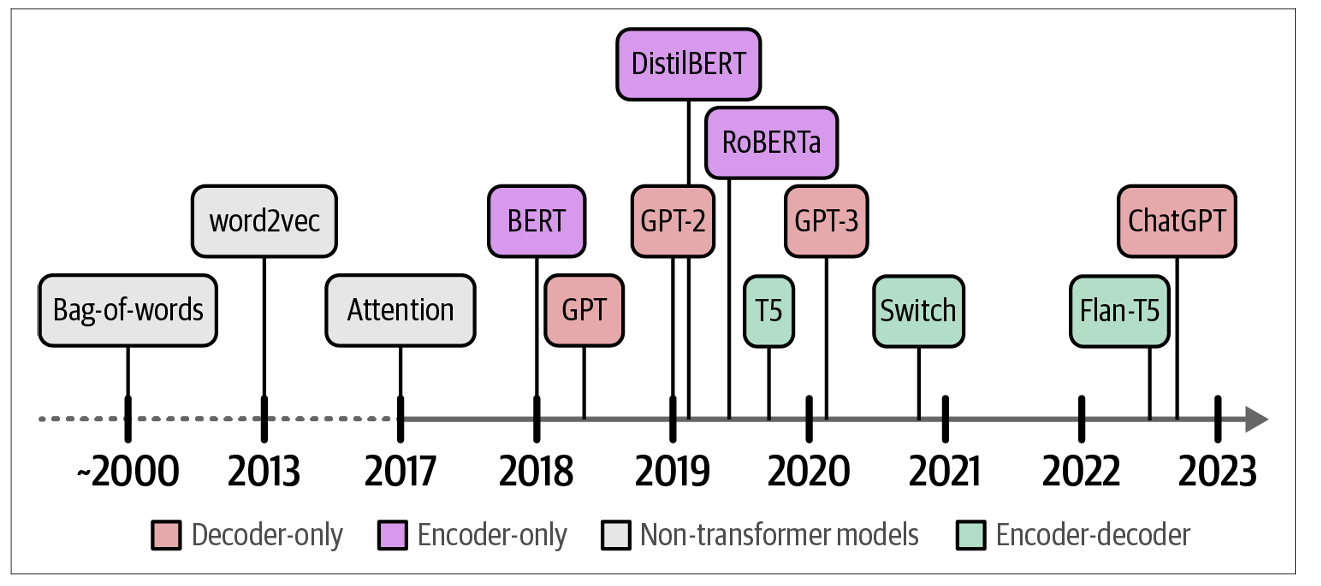

Source: https://github.com/HandsOnLLM/Hands-On-Large-Language-Models